In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data/Social_Network_Ads.csv')

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
X = data.iloc[:,2:4].values
y = data.iloc[:,4].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [42]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB(priors=[0.71,0.29],
                      var_smoothing=1e-09
                     )
model_nb.fit(X=X_train,y=y_train)

GaussianNB(priors=[0.71, 0.29])

In [43]:
y_pred = model_nb.predict(X=X_test)

In [44]:
from sklearn.metrics import confusion_matrix
cf_m = confusion_matrix(y_true=y_test,y_pred=y_pred)
cf_m

array([[76,  3],
       [11, 30]], dtype=int64)

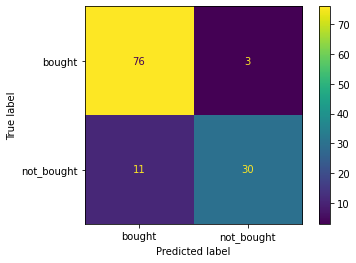

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay
plot = ConfusionMatrixDisplay(cf_m, display_labels=['bought','not_bought'])
plot.display_labels
plot.plot()

In [46]:
model_nb.get_params()

{'priors': [0.71, 0.29], 'var_smoothing': 1e-09}